In [18]:
import matplotlib.pyplot as plt
import pandas as pd

df_prices_0 = pd.read_csv('../data/round-3-island-data-bottle/prices_round_3_day_0.csv', sep=';')
df_prices_1 = pd.read_csv('../data/round-3-island-data-bottle/prices_round_3_day_1.csv', sep=';')
df_prices_2 = pd.read_csv('../data/round-3-island-data-bottle/prices_round_3_day_2.csv', sep=';')

df = pd.concat([df_prices_0, df_prices_1, df_prices_2])
df['timestamp'] = df['timestamp'] + 1000000 * df['day']
df = df.drop(columns=['day'])
df = df.reset_index(drop=True)

In [19]:
df_straw = df[df['product'] == 'STRAWBERRIES'].reset_index(drop=True).copy()
df_choc = df[df['product'] == 'CHOCOLATE'].reset_index(drop=True).copy()
df_roses = df[df['product'] == 'ROSES'].reset_index(drop=True).copy()
df_gift = df[df['product'] == 'GIFT_BASKET'].reset_index(drop=True).copy()

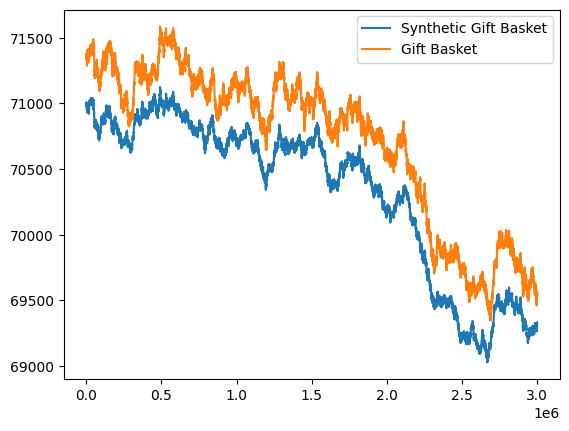

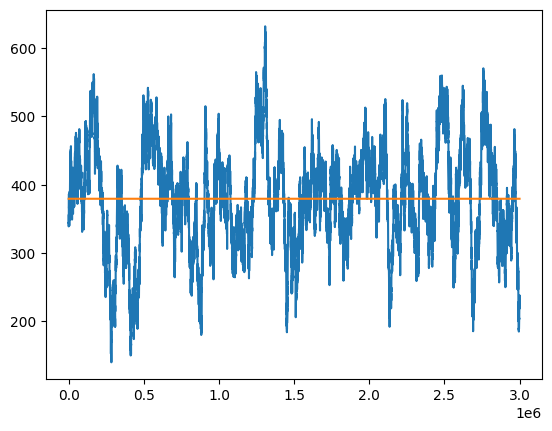

In [28]:
df_gift['mid_price_synthetic'] = (df_straw['mid_price'] * 6) + df_choc['mid_price'] * 4+ df_roses['mid_price']

#plot the synthetic price and the real price over time
# plt.plot(df_straw['timestamp'], df_straw['mid_price'], label='Strawberries')
# plt.plot(df_choc['timestamp'], df_choc['mid_price'], label='Chocolate')
# plt.plot(df_roses['timestamp'], df_roses['mid_price'], label='Roses')
plt.plot(df_gift['timestamp'], df_gift['mid_price_synthetic'], label='Synthetic Gift Basket')
plt.plot(df_gift['timestamp'], df_gift['mid_price'], label='Gift Basket')
plt.legend()
plt.show()

df_gift['synthetic_error'] = df_gift['mid_price'] - df_gift['mid_price_synthetic']
plt.plot(df_gift['timestamp'], df_gift['synthetic_error'], label = 'Synthetic Error')
#plot average error line
plt.plot(df_gift['timestamp'], [df_gift['synthetic_error'].mean()]*len(df_gift['timestamp']), label = 'Average Error')
plt.show()


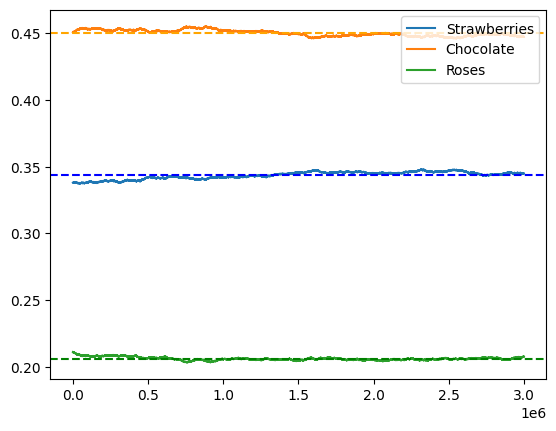

In [27]:
df_gift['straw_percentage'] = (df_straw['mid_price']*6) / df_gift['mid_price_synthetic']
df_gift['choc_percentage'] = (df_choc['mid_price']*4) / df_gift['mid_price_synthetic']
df_gift['roses_percentage'] = df_roses['mid_price'] / df_gift['mid_price_synthetic']

#plot percentages as a stacked line plot
plt.plot(df_gift['timestamp'], df_gift['straw_percentage'], label='Strawberries')
plt.plot(df_gift['timestamp'], df_gift['choc_percentage'], label='Chocolate')
plt.plot(df_gift['timestamp'], df_gift['roses_percentage'], label='Roses')
#add mean lines for each product
plt.axhline(y=df_gift['straw_percentage'].mean(), color='blue', linestyle='--')
plt.axhline(y=df_gift['choc_percentage'].mean(), color='orange', linestyle='--')
plt.axhline(y=df_gift['roses_percentage'].mean(), color='green', linestyle='--')
plt.legend()
plt.show()
